<a href="https://colab.research.google.com/github/YuliiaUtkina/Git_modul_pyhton/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%964_Pandas_%2B_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [16]:
!pip install SQLAlchemy
!pip install mysql-connector-python

In [8]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

con = mysql.connector.connect(user='user1',password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [18]:
import pandas as pd
sql = """
SELECT YEAR(hire_date) as hire_year, count(emp_no) as emp_number
FROM employees
GROUP BY hire_year
ORDER BY hire_year
"""

df=pd.read_sql(sql, con)
print(df)

    hire_year  emp_number
0        1985       35316
1        1986       36150
2        1987       33501
3        1988       31436
4        1989       28394
5        1990       25610
6        1991       22568
7        1992       20402
8        1993       17772
9        1994       14835
10       1995       12115
11       1996        9574
12       1997        6669
13       1998        4155
14       1999        1514
15       2000          13


In [ ]:
import warnings
warnings.filterwarnings('ignore')

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

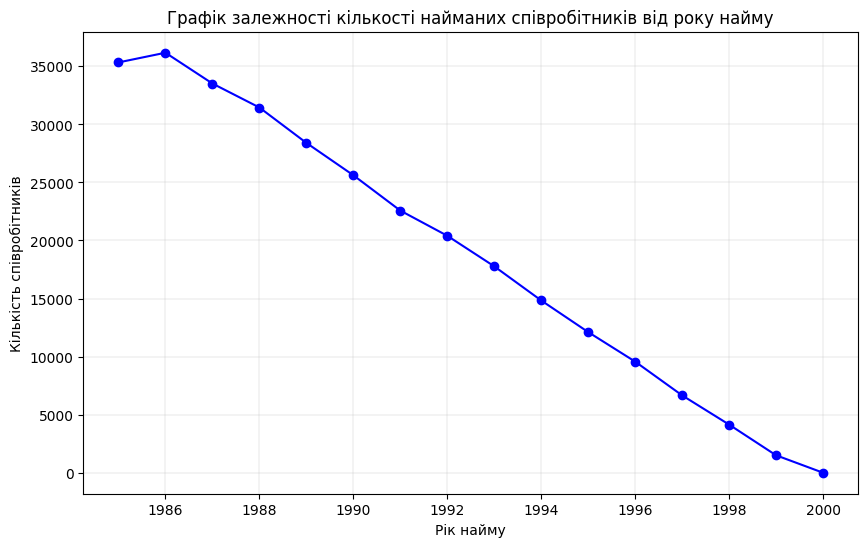

In [21]:
import matplotlib.pyplot as plt


# Візуалізація
plt.figure(figsize=(10, 6))
plt.plot(df['hire_year'], df['emp_number'], marker='o', linestyle='-', color='b')
plt.title('Графік залежності кількості найманих співробітників від року найму')
plt.xlabel('Рік найму')
plt.ylabel('Кількість співробітників')
plt.grid(True, linewidth=0.2)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [24]:
query_years = """
SELECT
    TIMESTAMPDIFF(YEAR, from_date, to_date) AS years_on_position, from_date, to_date
FROM
    titles
WHERE
    title = 'Engineer'
    AND to_date != '9999-01-01';
"""

# Читання даних з бази даних у DataFrame
df_years = pd.read_sql(query_years, con)

# Виведення результату
print(df_years)

       years_on_position   from_date     to_date
0                      9  1986-12-01  1995-12-01
1                      5  1990-02-18  1995-02-18
2                      8  1992-12-18  2000-12-18
3                      8  1987-04-03  1995-04-03
4                      5  1995-03-20  2001-03-19
...                  ...         ...         ...
84015                  9  1989-11-23  1998-11-23
84016                  5  1989-07-30  1994-07-30
84017                  0  1993-02-22  1993-10-27
84018                  6  1996-05-13  2002-05-13
84019                  4  1987-08-30  1992-08-29

[84020 rows x 3 columns]


In [23]:
query_years = """
SELECT
    emp_no,
    TIMESTAMPDIFF(YEAR, from_date, to_date) AS years_on_position
FROM
    titles
WHERE
    title = 'Engineer'
    AND to_date != '9999-01-01';
"""

# Читання даних з бази даних у DataFrame
df_years = pd.read_sql(query_years, con)

# Виведення результату
print(df_years)

       emp_no  years_on_position
0       10004                  9
1       10009                  5
2       10012                  8
3       10018                  8
4       10026                  5
...       ...                ...
84015  499972                  9
84016  499984                  5
84017  499994                  0
84018  499996                  6
84019  499997                  4

[84020 rows x 2 columns]


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

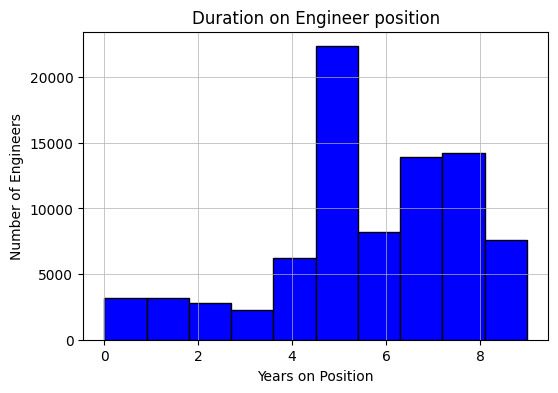

In [31]:
plt.figure(figsize=(6, 4))

plt.hist(df_years['years_on_position'], edgecolor='black', color='blue')
plt.title('Duration on Engineer position')
plt.xlabel('Years on Position')
plt.ylabel('Number of Engineers')
plt.grid(True, linewidth=0.5)

plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [32]:
con.close()